In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

boston = pd.read_csv('/content/drive/My Drive/506_Final_Project/Boston_moon_data.csv')
LA = pd.read_csv('/content/drive/My Drive/506_Final_Project/LA_moon_data.csv')
chicago = pd.read_csv('/content/drive/My Drive/506_Final_Project/Chicago_moon_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


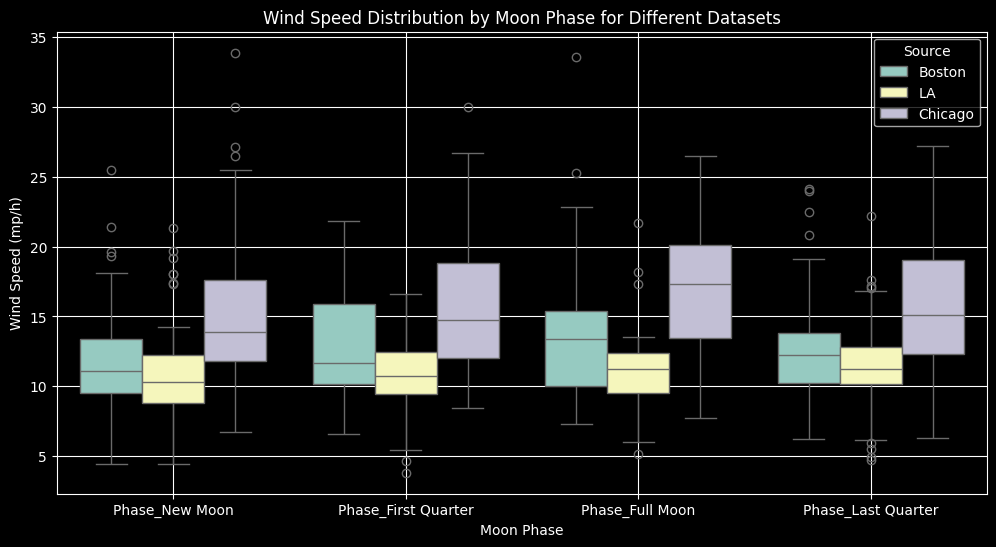

In [ ]:
# Add a source column to differentiate DataFrames
boston['source'] = 'Boston'
LA['source'] = 'LA'
chicago['source'] = 'Chicago'

# Combine the DataFrames
combined_df = pd.concat([boston, LA, chicago], ignore_index=True)

# One-hot encoding the moon_phase column
combined_encoded = pd.get_dummies(combined_df, columns=['Phase'])

# Melting the DataFrame for plotting
df_melted = combined_encoded.melt(id_vars=['wind_speed (mp/h)', 'source'],
                                   value_vars=['Phase_New Moon',
                                               'Phase_First Quarter',
                                               'Phase_Full Moon',
                                               'Phase_Last Quarter'],
                                   var_name='Phase',
                                   value_name='is_present')

# Filter for present moon phases
df_melted = df_melted[df_melted['is_present'] == 1]

# Plotting
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Phase', y='wind_speed (mp/h)', hue='source', data=df_melted)
plt.title('Wind Speed Distribution by Moon Phase for Different Datasets')
plt.xlabel('Moon Phase')
plt.ylabel('Wind Speed (mp/h)')
plt.legend(title='Source')
plt.grid(True)
plt.show()

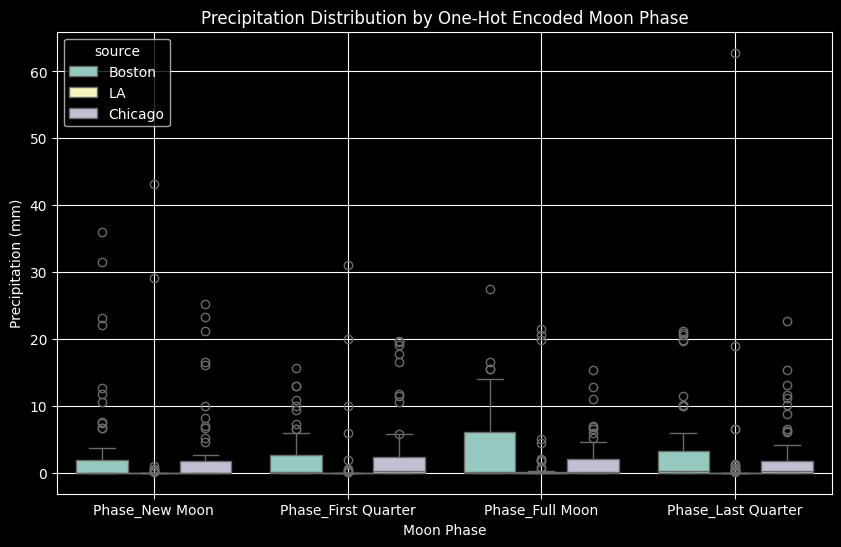

In [ ]:
combined_encoded = pd.get_dummies(combined_df, columns=['Phase'])

# Melting the DataFrame for plotting
df_melted = combined_encoded.melt(id_vars=['precipitation (mm)', 'source'],
                                   value_vars=['Phase_New Moon',
                                               'Phase_First Quarter',
                                               'Phase_Full Moon',
                                               'Phase_Last Quarter'],
                                   var_name='Phase',
                                   value_name='is_present')

# Filter for present moon phases (i.e., where value is 1)
df_melted = df_melted[df_melted['is_present'] == 1]

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Phase', y='precipitation (mm)', hue='source', data=df_melted)
plt.title('Precipitation Distribution by One-Hot Encoded Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

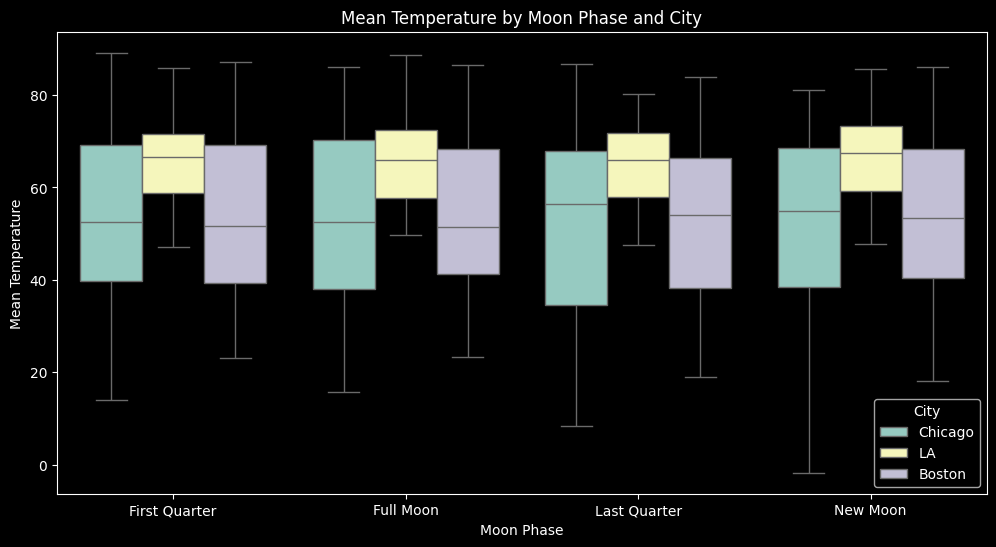

In [66]:
# Combine data from all cities
file_paths = {
    "Chicago": "/content/drive/MyDrive/506_Final_Project/Chicago_moon_data.csv",
    "LA": "/content/drive/MyDrive/506_Final_Project/LA_moon_data.csv",
    "Boston": "/content/drive/MyDrive/506_Final_Project/Boston_moon_data.csv"
}

data_frames = []
for city, path in file_paths.items():
    city_data = pd.read_csv(path)
    city_data['City'] = city  # Add a column for city name
    city_data['Date'] = pd.to_datetime(city_data['Date'], errors='coerce')
    data_frames.append(city_data)

# Concatenate all city data into one DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)

# Fill missing values in precipitation and wind_speed as done previously
combined_data['precipitation (mm)'] = combined_data['precipitation (mm)'].fillna(0)
combined_data['wind_speed (mp/h)'] = combined_data['wind_speed (mp/h)'].fillna(combined_data['wind_speed (mp/h)'].mean())

# Box plot for mean temperature by moon phase and city
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='Phase', y='Mean', hue='City')
plt.title("Mean Temperature by Moon Phase and City")
plt.xlabel("Moon Phase")
plt.ylabel("Mean Temperature")
plt.legend(title='City')
plt.show()